In [5]:
import numpy
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import IBMQ, Aer
from math import pi
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
#provider = IBMQ.enable_account ('ca11f5d389b8c2c86914de9b6159e4d24496ff6e237bb8e57b2b3fce845a084cd3558138208942d5691163461064f7d4de59490006743ea3e930335923a30f55')
# Create a Quantum Register with 2 qubits.
provider = IBMQ.load_account()

In [26]:
# Create a Quantum Circuit acting on the q register
alpha = [0,pi/8, pi/4, 3*pi/8, pi/2]
phi = np.arange(0,21*pi/10,pi/10)
#alpha1, phi1 =np.meshgrid(alpha,phi)
phi1, alpha1 = np.meshgrid(phi, alpha)
X = alpha1
Y = phi1

count_list1=[]
count_list=[]

for x in alpha:
    for y in np.arange(0,21*pi/10,pi/10):
        c = ClassicalRegister (2, 'c')
        q = QuantumRegister(2, 'q')
        qc = QuantumCircuit(q,c)
        qc.h(q[0])
        qc.u3(2*y,0,0,q[1])
        qc.u1(x,q[0])
        qc.ch(q[1],q[0])
        qc.measure(q[0], c[0])
        #qc.measure(q[1], c[1])
        #backend = provider.get_backend('ibmq_qasm_simulator')
        backend = Aer.get_backend('qasm_simulator')
        shots=8192
        # Compile and run the Quantum Program on a real device backend
        job_exp = execute(qc, backend=backend)
        result = job_exp.result()
        counts=result.get_counts(qc)
        count_list1.append(counts['00']/shots)
    count_list.append(count_list1)
    count_list1=[]

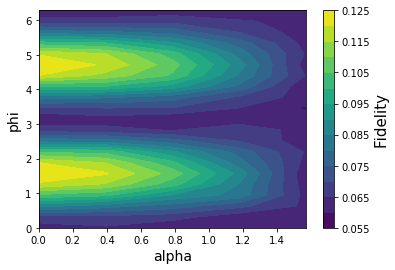

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.contourf(X, Y, count_list, 14)
#plt.contourf(X, Y, Fidelity_list2, 15)

cbar=plt.colorbar()
cbar.set_label('Fidelity', size=15)
plt.xlabel("alpha", color="black",size=14)
plt.ylabel("phi", color='black',size=14)
#plt.savefig('contour_AD.png', dpi=600)
plt.show()